<h1 align="center" style="background-color: lightgreen; color: black; padding: 10px; border: 2px solid black; text-shadow: 2px 2px 4px rgba(0,0,0,0.3), 0 0 25px rgba(0, 255, 0, 0.7);">
  K-Nearest Neighbors (KNN) Classification on the Iris Dataset
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load And Read Data
</h3>


In [2]:
Data=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Inspection 
</h3>

In [5]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
Data=Data.rename(columns={'SepalLengthCm':'Sepal_Length'})
Data=Data.rename(columns={'SepalWidthCm':'Sepal_Width'})
Data=Data.rename(columns={'PetalLengthCm':'Petal_Length'})
Data=Data.rename(columns={'PetalWidthCm':'Petal_Width'})

In [9]:
Data

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
Data=Data.drop(columns=['Id'])

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Visualization
</h3>


In [11]:
Data.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

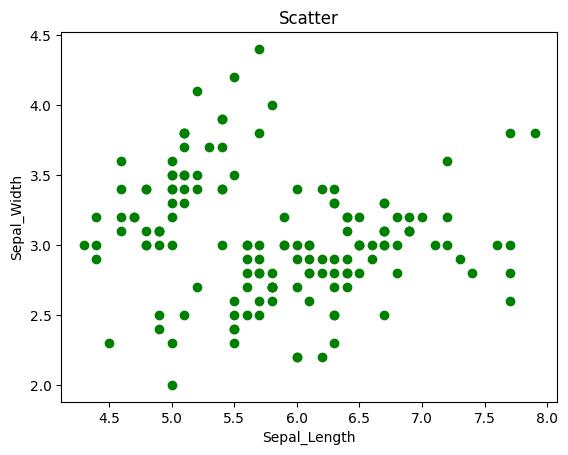

In [12]:
plt.scatter(Data['Sepal_Length'],Data['Sepal_Width'],color='green')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.title('Scatter')
plt.show()

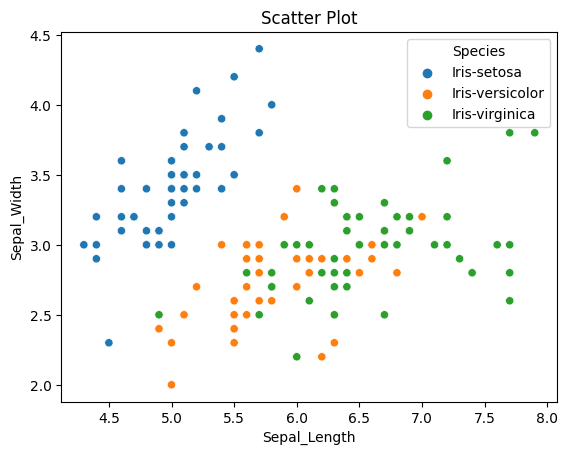

In [13]:
sns.scatterplot(x='Sepal_Length', y='Sepal_Width', hue='Species', data=Data)

plt.title('Scatter Plot')
plt.show()

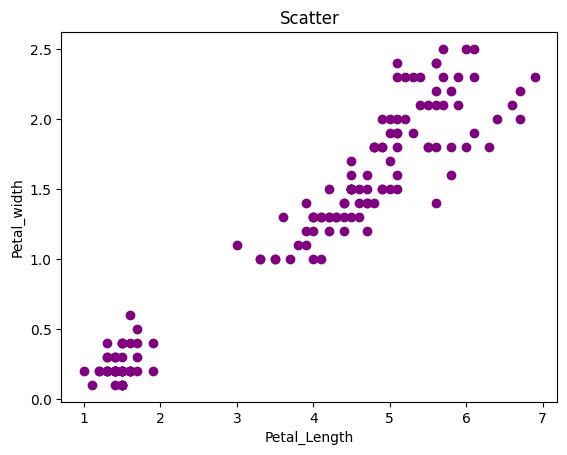

In [14]:
plt.scatter(Data['Petal_Length'],Data['Petal_Width'],color='purple')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_width')
plt.title('Scatter')
plt.show()

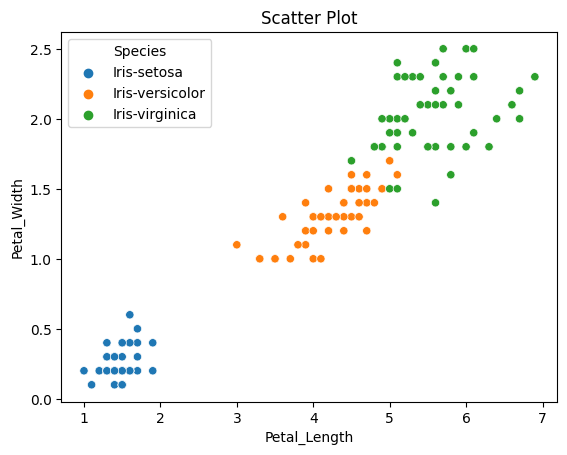

In [15]:
sns.scatterplot(x='Petal_Length',y='Petal_Width',hue='Species',data=Data)
plt.title('Scatter Plot')
plt.show()


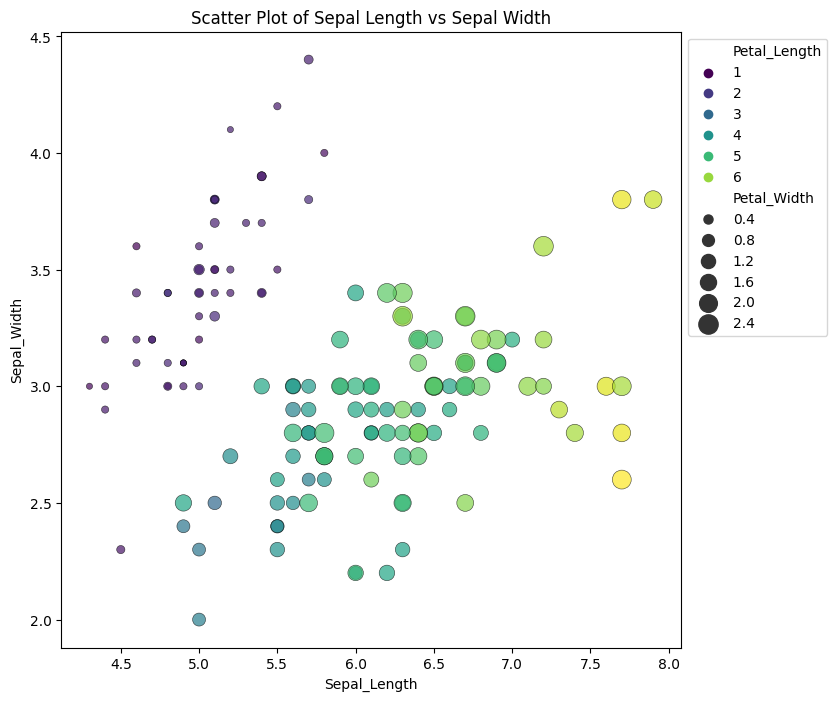

In [16]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=Data, 
                x='Sepal_Length', 
                y='Sepal_Width', 
                hue='Petal_Length', 
                size='Petal_Width',  
                sizes=(20, 200),     
                palette='viridis',     
                edgecolor='black', 
                alpha=0.7)             
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.legend(loc='best', bbox_to_anchor=(1, 1))  

In [17]:
Data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: ylabel='count'>

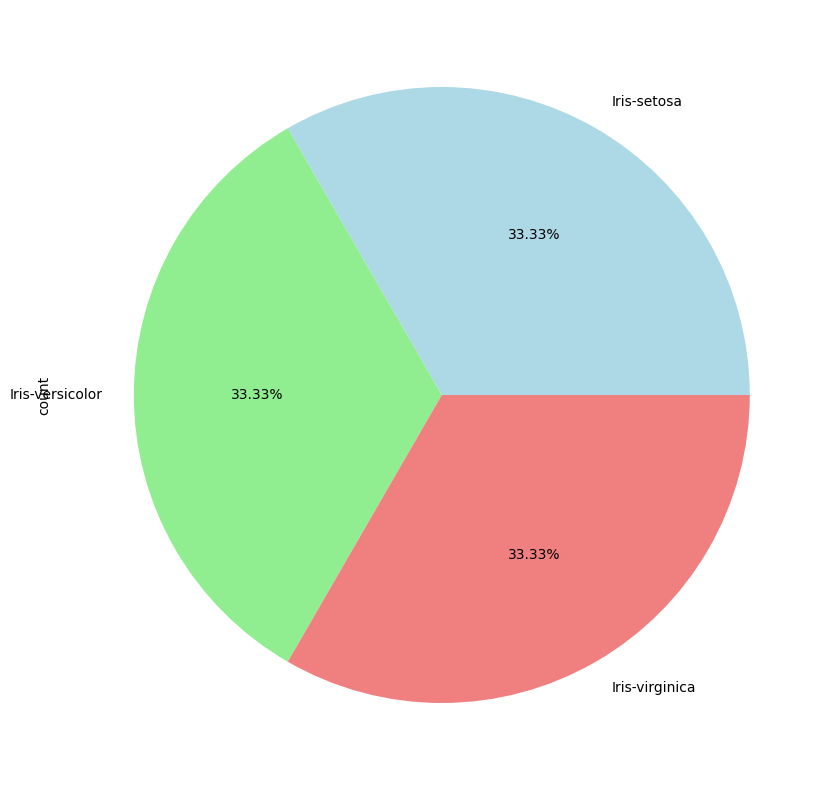

In [18]:
plt.figure(figsize=(10,10))
Data['Species'].value_counts().plot.pie(autopct='%.2f%%',colors=['lightblue', 'lightgreen', 'lightcoral'])

<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Observation: Balanced Dataset
</h3>
<hr style="border: 1px solid black; margin: 5px 0;">
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  The dataset is balanced, meaning no species dominates the dataset. This makes it ideal for training models without introducing bias.  
  <br><br>
  Additionally, since each class has an equal number of instances, there is no need for class balancing techniques such as oversampling or undersampling.
</p>


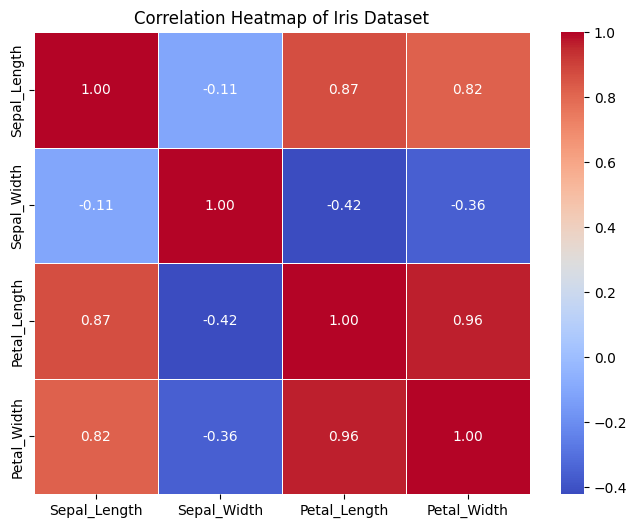

In [19]:
plt.figure(figsize=(8,6))
data=Data.select_dtypes(include='number')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

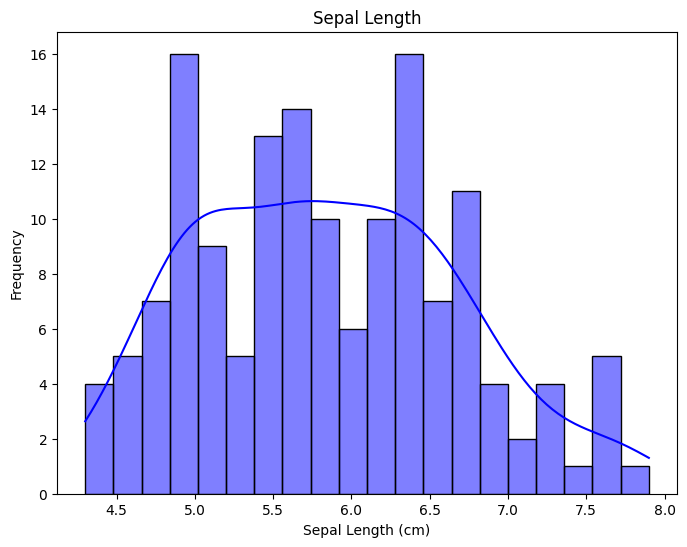

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(Data['Sepal_Length'], bins=20, kde=True, color='blue')
plt.title("Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

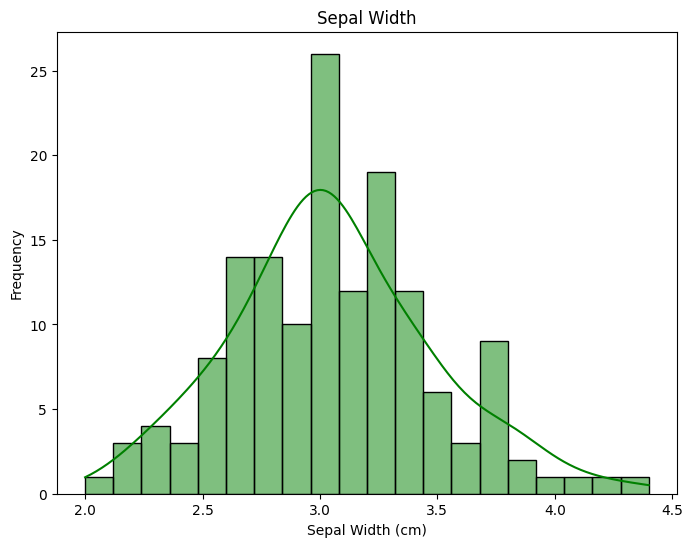

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(Data['Sepal_Width'],bins=20,kde=True,color='green')
plt.title('Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

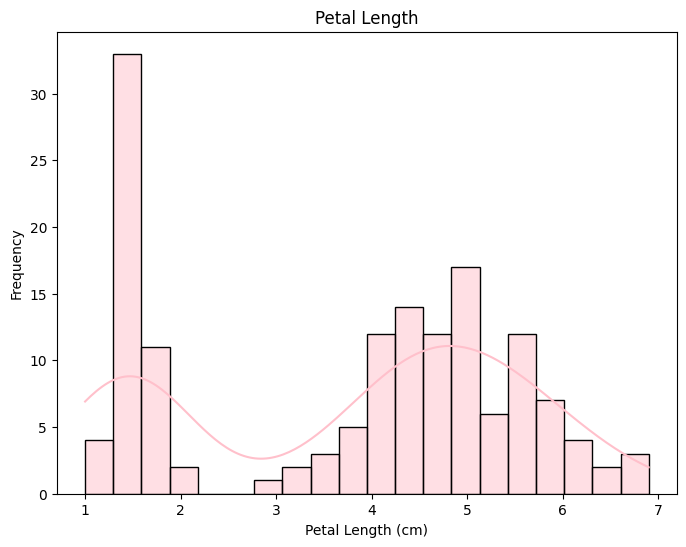

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(Data['Petal_Length'],bins=20,kde=True,color='pink')
plt.title('Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

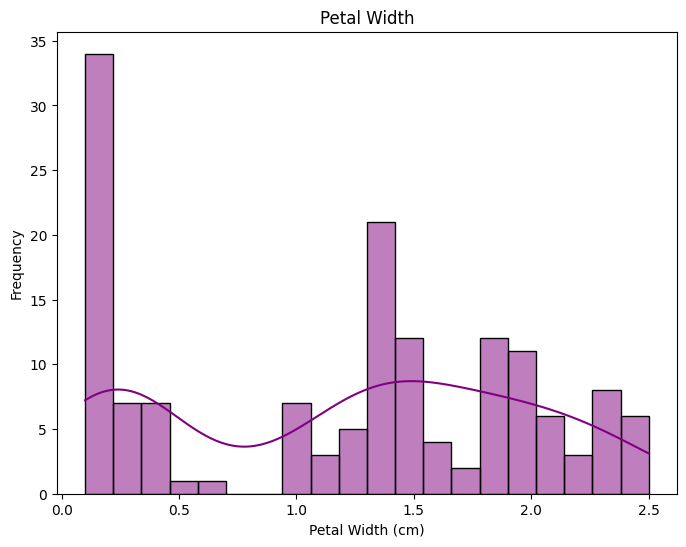

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(Data['Petal_Width'],bins=20,kde=True,color='purple')
plt.title('Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Split Data  
</h3>


In [24]:
X=Data.iloc[:,0:4]
Y=Data.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  KNN From Scratch 
</h3>

In [25]:
def evaluation(ytest,ypredict):
    accuracy = accuracy_score(ytest, ypredict)
    print(f"Accuracy:{accuracy:.1%}")
    count1=0
    for i,j in zip(ytest,ypredict):
           if i!=j:
              count1+=1
    correct=len(ytest)-count1
    print(f"Number of Correct Prediction:{correct}")
    print(f"Number of Wrong Prediction:{count1}")

<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  📌 Euclidean Distance in K-Nearest Neighbors (KNN)
</h3>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Euclidean distance is the most commonly used distance metric in KNN. It calculates the straight-line (shortest) distance between two points in space.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Formula of Euclidean Distance
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  For two points A and B with coordinates:
</p>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
A = (x₁, x₂, x₃, ..., xₙ)
B = (y₁, y₂, y₃, ..., yₙ)
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  The Euclidean distance is given by:
</p>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
d(A, B) = √∑(xᵢ - yᵢ)²
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  This formula measures the straight-line distance between A and B in an n-dimensional space.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📌 Why Use Euclidean Distance for the Iris Dataset?
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ All features (Sepal & Petal Length/Width) are continuous.</li>
  <li>✅ The scale of all measurements is in centimeters (cm), making it suitable.</li>
  <li>✅ Works well when features are numerically similar in scale.</li>
</ul>


In [26]:
def euclidean(l1,l2):
    
    return (np.sqrt(np.sum((l1-l2)**2,axis=1)))

In [27]:
k=5
y_predict=[]
X_train1 = np.array(X_train)  
X_test1= np.array(X_test)   
y_train1 = np.array(y_train)             
y_test1= np.array(y_test)
for i in X_test1:
    distances=euclidean(i,X_train1)
    k_neig=np.argsort(distances)[:k]
    k_neig_label = [y_train1[x] for x in k_neig]
    mfreq = Counter(k_neig_label).most_common(1)[0][0]
    y_predict.append(mfreq)
y_predict=np.array(y_predict)        

In [28]:
evaluation(y_test1, y_predict)

Accuracy:100.0%
Number of Correct Prediction:30
Number of Wrong Prediction:0


<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  📌 What is Cosine Similarity?
</h3>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Cosine similarity is a metric used to determine how similar two vectors are based on their direction, not magnitude. 
  It measures the cosine of the angle between two vectors, making it useful in high-dimensional spaces like text classification and recommendation systems.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Why Use Cosine Similarity in Classification?
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ Good for high-dimensional data (e.g., text, embeddings, and sparse data).</li>
  <li>✅ Ignores magnitude, focusing only on orientation.</li>
  <li>✅ Works well in k-NN classification, where similarity is more meaningful than Euclidean distance.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Cosine Similarity Formula
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  For two vectors A and B, cosine similarity is calculated as:
</p>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
cos(θ) = (A ⋅ B) / (∥A∥ × ∥B∥)
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Where:
</p>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>A ⋅ B → Dot product of the vectors.</li>
  <li>∥A∥ and ∥B∥ → Euclidean norms (magnitudes).</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  Expanded Formula:
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
cos(θ) = ∑(Aᵢ Bᵢ) / (√∑Aᵢ² × √∑Bᵢ²)
</pre>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Cosine Similarity Range and Meaning
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
-1 ≤ cos(θ) ≤ 1
</pre>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1 → Vectors are identical (same direction).</li>
  <li>0 → Vectors are completely different (orthogonal).</li>
  <li>-1 → Vectors are opposite (opposite direction).</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Using Cosine Similarity in k-NN Classification
</h4>
<h5 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  Steps for Classification:
</h5>
<ol style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1️⃣ Compute cosine similarity between the test sample and each training sample.</li>
  <li>2️⃣ Sort training samples by highest similarity (most similar first).</li>
  <li>3️⃣ Select k nearest neighbors based on similarity.</li>
  <li>4️⃣ Get the labels of these k-nearest neighbors.</li>
  <li>5️⃣ Assign the most frequent label to the test sample.</li>
</ol>


In [29]:
def multiply_lists(l1, l2):
    return np.sum(l1 * l2, axis=1)   

In [30]:
def norm(l):
    return np.sqrt(np.sum(l**2)) 

In [31]:
def cosinsemilarity(l1,l2):
    x=multiply_lists(l1,l2)
    n1=norm(l1)
    n2 = np.linalg.norm(l2, axis=1) 
    return x/(n1*n2)

In [32]:
k=5
y_predict2=[]
X_train2 = np.array(X_train)  
X_test2= np.array(X_test)   
y_train2 = np.array(y_train)             
y_test2= np.array(y_test)
for i in X_test2:
    distances=cosinsemilarity(i,X_train2)
    k_neig=np.argsort(-distances)[:k]
    k_neig_label = [y_train2[x] for x in k_neig]
    mfreq = Counter(k_neig_label).most_common(1)[0][0]
    y_predict2.append(mfreq)
y_predict2=np.array(y_predict2)      


In [33]:
evaluation(y_test2, y_predict2)

Accuracy:100.0%
Number of Correct Prediction:30
Number of Wrong Prediction:0


<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Alternative Distance Measure for k-NN: Manhattan Distance
</h3>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 What is Manhattan Distance?
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Manhattan Distance is the sum of absolute differences between the coordinates of two points. 
  It measures how much you need to move horizontally and vertically to get from one point to another (like city blocks).
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Mathematical Formula:
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
Manhattan Distance = ∑ |Aᵢ - Bᵢ|
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Where:
</p>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>A and B are vectors (feature values of two samples).</li>
  <li>Aᵢ and Bᵢ are individual feature values.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Why Use Manhattan Distance?
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ Works well when features are not correlated and vary in different scales.</li>
  <li>✅ More robust to outliers compared to Euclidean Distance.</li>
  <li>✅ Performs well in high-dimensional spaces when features are sparse.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Steps to Implement k-NN with Manhattan Distance
</h4>
<ol style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1️⃣ Convert the dataset into NumPy arrays.</li>
  <li>2️⃣ Compute Manhattan Distance between each test sample and all training samples.</li>
  <li>3️⃣ Find the k-nearest neighbors (smallest distance values).</li>
  <li>4️⃣ Predict the label by majority vote from neighbors.</li>
</ol>


In [34]:
def manhattan(l1,l2):
    return (np.sum(np.abs(l1-l2),axis=1))

In [35]:
k=10
y_predict3=[]
X_train3 = np.array(X_train)  
X_test3 = np.array(X_test)   
y_train3 = np.array(y_train)             
y_test3 = np.array(y_test)
for i in X_test3:
    distances=manhattan(i,X_train3)
    k_neig=np.argsort(distances)[:k]
    k_neig_label = [y_train3[x] for x in k_neig]
    mfreq = Counter(k_neig_label).most_common(1)[0][0]
    y_predict3.append(mfreq)
y_predict3=np.array(y_predict3)      

In [36]:
evaluation(y_test3, y_predict3)

Accuracy:93.3%
Number of Correct Prediction:28
Number of Wrong Prediction:2
